**Сбербанк, Работа с данными на Python. Толстиков Валентин**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display
%matplotlib inline

### Упражнение 1

На одном графике изобразите время затраченное на вычисление с использованием массивов numpy и стандартных списков в питоне.  
Для более точных результатов замеряйте время выполнения функции несколько раз и усредняйте. 
* Используйте функцию `z = 2*x**2 + 4*y`
* Перемножение матриц размера n на n

In [2]:
def mean_run_time(x, y, func, n_runs=100):
    run_times = np.zeros(n_runs)
    for i in range(n_runs):
        start = time.time()
        func(x, y)
        run_times[i] = time.time() - start
    return run_times.mean()

In [3]:
def z_arrays(x, y):
    return 2 * x**2 + 4 * y

def z_lists(x, y):
    return [(2 * xi**2 + 4 * yi) for (xi, yi) in zip(x, y)]


vector_size = 4
x_array = 100 * np.random.random(vector_size)
y_array = 100 * np.random.random(vector_size)
x_list = list(x_array)
y_list = list(y_array)

print('Результат вычисления в numpy:', z_arrays(x_array, y_array), sep='\n', end='\n\n')
print('Результат вычисления в python:', z_lists(x_list, y_list), sep='\n')

Результат вычисления в numpy:
[11476.69419233  9141.63301693  8018.23485612  4102.49259079]

Результат вычисления в python:
[11476.694192329554, 9141.6330169283, 8018.234856118828, 4102.492590786596]


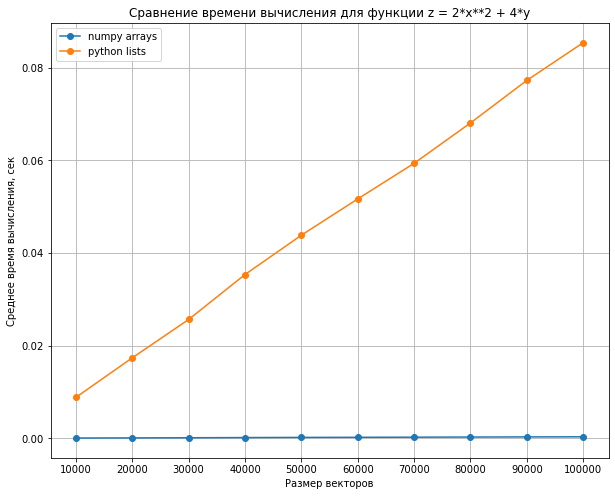

In [4]:
vector_sizes = np.arange(10000, 100001, 10000)
n_runs = 100

numpy_times, python_times = list(), list()
for vector_size in vector_sizes:
    x_array = 100 * np.random.random(vector_size)
    y_array = 100 * np.random.random(vector_size)
    x_list = list(x_array)
    y_list = list(y_array)
    numpy_times.append(mean_run_time(x_array, y_array, z_arrays, n_runs))
    python_times.append(mean_run_time(x_list, y_list, z_lists, n_runs))

plt.figure(figsize=(10, 8))
plt.plot(vector_sizes, numpy_times, 'o-', label='numpy arrays')
plt.plot(vector_sizes, python_times, 'o-', label='python lists')
plt.legend()
plt.xticks(vector_sizes)
plt.xlabel('Размер векторов')
plt.ylabel('Среднее время вычисления, сек')
plt.title('Сравнение времени вычисления для функции z = 2*x**2 + 4*y')
plt.grid();

In [5]:
def matrix_multiply(X, Y):
    n = len(X)
    Z = [[None for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(n):
            Z[i][j] = sum([X[i][k] * Y[k][j] for k in range(n)])
    return Z


matrix_size = 4
X_list = [[np.random.randint(1, 9) for _ in range(matrix_size)] for _ in range(matrix_size)]
Y_list = [[np.random.randint(1, 9) for _ in range(matrix_size)] for _ in range(matrix_size)]
X_array = np.array(X_list)
Y_array = np.array(Y_list)

print('Результат умножения матриц в numpy:', np.dot(X_array, Y_array), sep='\n', end='\n\n')
print('Результат умножения матриц в python:', matrix_multiply(X_list, Y_list), sep='\n')

Результат умножения матриц в numpy:
[[ 72  70  68  92]
 [123 100  92 117]
 [120  99  99 130]
 [113  90 102 123]]

Результат умножения матриц в python:
[[72, 70, 68, 92], [123, 100, 92, 117], [120, 99, 99, 130], [113, 90, 102, 123]]


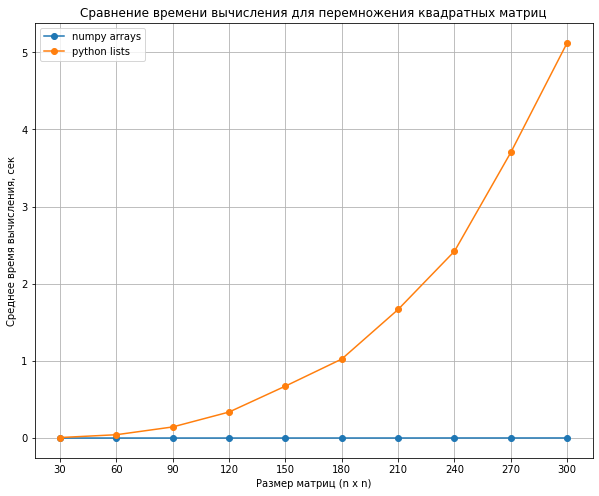

In [6]:
matrix_sizes = np.arange(30, 301, 30)
n_runs = 10

numpy_times, python_times = list(), list()
for matrix_size in matrix_sizes:
    X_list = [[np.random.uniform(0, 100) for _ in range(matrix_size)] for _ in range(matrix_size)]
    Y_list = [[np.random.uniform(0, 100) for _ in range(matrix_size)] for _ in range(matrix_size)]
    X_array = np.array(X_list)
    Y_array = np.array(Y_list)
    numpy_times.append(mean_run_time(X_array, Y_array, np.dot, n_runs))
    python_times.append(mean_run_time(X_list, Y_list, matrix_multiply, n_runs))

plt.figure(figsize=(10, 8))
plt.plot(matrix_sizes, numpy_times, 'o-', label='numpy arrays')
plt.plot(matrix_sizes, python_times, 'o-', label='python lists')
plt.legend()
plt.xticks(matrix_sizes)
plt.xlabel('Размер матриц (n x n)')
plt.ylabel('Среднее время вычисления, сек')
plt.title('Сравнение времени вычисления для перемножения квадратных матриц')
plt.grid();

### Упражнение 2
* Создайте массив чисел от 2 до 75. Выведите только нечётные. 
* Присвойте нечётным числам этого массива значение -1.



In [7]:
a = np.arange(2, 76)
print('Исходный массив:', a, sep='\n', end='\n\n')
mask = (a % 2 == 1)
print('Нечётные числа исходного массива:', a[mask], sep='\n', end='\n\n')
a[mask] = -1
print('Модифицированный массив:', a, sep='\n')

Исходный массив:
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75]

Нечётные числа исходного массива:
[ 3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49
 51 53 55 57 59 61 63 65 67 69 71 73 75]

Модифицированный массив:
[ 2 -1  4 -1  6 -1  8 -1 10 -1 12 -1 14 -1 16 -1 18 -1 20 -1 22 -1 24 -1
 26 -1 28 -1 30 -1 32 -1 34 -1 36 -1 38 -1 40 -1 42 -1 44 -1 46 -1 48 -1
 50 -1 52 -1 54 -1 56 -1 58 -1 60 -1 62 -1 64 -1 66 -1 68 -1 70 -1 72 -1
 74 -1]


### Упражнение 3

* Найдите в документации функцию, которая удаляет из одного массива элементы, которые есть в другом. 
* Приведите примеры использования.

Возможно, имеется ввиду функция `numpy.setdiff1d` - разность множеств элементов массивов:

In [8]:
a = np.array([5, 9, 9, 5, 4, 4, 7, 8, 3, 2, 2, 0])
b = np.array([5, 2 ,8, 8, 1])
print('a =', a)
print('b =', b)
print('a \ b =', np.setdiff1d(a, b))

a = [5 9 9 5 4 4 7 8 3 2 2 0]
b = [5 2 8 8 1]
a \ b = [0 3 4 7 9]


Если необходимо сохранить порядок и повторяющиеся элементы, можно воспользоваться функцией `numpy.isin`:

In [9]:
print('a \ b =', a[np.isin(a, b, invert=True)])

a \ b = [9 9 4 4 7 3 0]


### Упражнение 4

* Создайте случайную квадратную матрицу случайного размера от 10 до 100. 
* Найдите максимум и сумму элементов.
* Поделите каждый элемент матрицы на максимум.
* Отнимите от каждой строки матрицы среднее по строке.
* Замените максимальное значение на -1.

In [10]:
n = np.random.randint(10, 101)
A = 100 * np.random.rand(n, n)

# Для проверки операций с матрицей будем использовать верхний левый угол матрицы
s = (slice(0, 5), slice(0, 5))

print('Исходная матрица A:', A[s], sep='\n', end='\n\n')
print('Размер матрицы A = {}'.format(A.shape), end='\n\n')

print('Максимальный элемент матрицы A = {}'.format(A.max()))
print('Сумма всех элементов матрицы A = {}'.format(A.sum()), end='\n\n')

A /= A.max()
print('Матрица A после деления на максимум:', A[s], sep='\n', end='\n\n')

A = A - A.mean(axis=1, keepdims=True)
print('Матрица A после вычитания среднего по строке:', A[s], sep='\n', end='\n\n')

ind_max = np.where(A == A.max())
print('Максимальные элементы модифицированной матрицы A[ind_max]: {}'.format(A[ind_max]))
A[ind_max] = -1
print('После замены максимума на -1 A[ind_max]: {}'.format(A[ind_max]))
print('Новые максимальные элементы: {}'.format(A[np.where(A == A.max())]))

Исходная матрица A:
[[99.60737033  8.51657719  9.70333935 43.70507157 25.08304538]
 [38.2901456  76.98250171 18.30566128 18.2382803  50.40714174]
 [39.09598979 95.39674792 36.05433012 70.12212821 67.24090388]
 [83.56862211 24.17431715 40.48117809 31.77759085 58.65048199]
 [98.89113613  4.378079   16.93699264 91.76391104 86.76287761]]

Размер матрицы A = (83, 83)

Максимальный элемент матрицы A = 99.98879037325999
Сумма всех элементов матрицы A = 345750.2105225676

Матрица A после деления на максимум:
[[0.99618537 0.08517532 0.09704427 0.43709971 0.25085857]
 [0.38294438 0.76991132 0.18307714 0.18240325 0.50412793]
 [0.39100373 0.95407443 0.36058372 0.7012999  0.67248442]
 [0.83577991 0.24177027 0.40485716 0.31781153 0.58657057]
 [0.98902223 0.0437857  0.16938891 0.91774199 0.86772604]]

Матрица A после вычитания среднего по строке:
[[ 0.54697903 -0.36403102 -0.35216207 -0.01210663 -0.19834776]
 [-0.11871463  0.26825231 -0.31858187 -0.31925576  0.00246892]
 [-0.14896888  0.41410182 -0.1

### Упражнение 5
* Напишите функцию, которая берет многомерный вещественный массив с пропущенными значениями (np.nan) и возвращает его копию с заполненными пропусками (заменять средним значением всех элементов массива). Если в массиве одни пропущенные значения, заполните их нулями.

In [11]:
def fill_array(a):
    if a[~np.isnan(a)].size:
        return np.nan_to_num(a, nan=np.nanmean(a))
    else:
        return np.zeros_like(a)

In [12]:
A = np.array([[[1., np.nan], [np.nan, np.nan]], [[np.nan, 3.], [5., 7.]]])
print('Исходная матрица:', A, sep='\n', end='\n\n')
print('Матрица с заполненными пропусками:', fill_array(A), sep='\n', end='\n\n')
print('=' * 33, end='\n\n')

A = np.array([[[np.nan, np.nan], [np.nan, np.nan]], [[np.nan, np.nan], [np.nan, np.nan]]])
print('Исходная матрица:', A, sep='\n', end='\n\n')
print('Матрица с заполненными пропусками:', fill_array(A), sep='\n')

Исходная матрица:
[[[ 1. nan]
  [nan nan]]

 [[nan  3.]
  [ 5.  7.]]]

Матрица с заполненными пропусками:
[[[1. 4.]
  [4. 4.]]

 [[4. 3.]
  [5. 7.]]]


Исходная матрица:
[[[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]]

Матрица с заполненными пропусками:
[[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]


### Упражнение 6
* Напишите функцию которая нормализирует заданный numpy-массив, так чтобы его значения лежали в интервале $[0, 1]$.

In [13]:
def normalize_array(a):
    a_min, a_max = a.min(), a.max()
    return (a - a_min) / (a_max - a_min)

In [14]:
A = 100 * np.random.rand(5, 5) - 50
print('Исходный массив:', A, sep='\n', end='\n\n')
print('Нормализованный массив:', normalize_array(A), sep='\n')

Исходный массив:
[[-28.01910258   2.16891708 -22.48521034 -10.38682272 -42.66309392]
 [-29.78320119  47.86671848  31.35789936 -35.70389094 -46.03239401]
 [-42.65521098  10.71438252 -47.06133219  34.29101858  38.71740018]
 [ 11.91095113  -4.55587589  39.02439991  12.88855676  18.30461657]
 [ -7.82944068 -38.18398744   1.96106881   4.14979714  -8.50291005]]

Нормализованный массив:
[[0.20059645 0.51860592 0.25889209 0.38634007 0.04633234]
 [0.18201291 1.         0.82609124 0.11964263 0.01083914]
 [0.04641538 0.60862637 0.         0.85698959 0.90361839]
 [0.62123137 0.44776498 0.90685242 0.63152976 0.68858413]
 [0.41328028 0.09351656 0.51641639 0.5394731  0.40618576]]


### Упражнение 7
* Запишите numpy-array в файл.
* Считайте numpy-array из файла.

In [15]:
a1 = np.random.rand(4, 4)
print('Массив для записи:', a1, sep='\n', end='\n\n')
np.save('hw2_array.npy', a1)

a2 = np.load('hw2_array.npy')
print('Считанный массив:', a2, sep='\n', end='\n\n')

Массив для записи:
[[0.02369527 0.93705595 0.5051845  0.11577068]
 [0.05599125 0.48457961 0.95352333 0.38010832]
 [0.29191706 0.09060019 0.93163612 0.96712976]
 [0.98763995 0.89622569 0.69681765 0.92700713]]

Считанный массив:
[[0.02369527 0.93705595 0.5051845  0.11577068]
 [0.05599125 0.48457961 0.95352333 0.38010832]
 [0.29191706 0.09060019 0.93163612 0.96712976]
 [0.98763995 0.89622569 0.69681765 0.92700713]]



### Упражнение 8
* Создайте случайный массив
* Найдите в массиве элемент ближайший к данному

In [16]:
a = 100 * np.random.rand(10) - 50
x = 0
print('Исходный массив:', a, sep='\n', end='\n\n')

dist = abs(a - x)
print('Элемент ближайший к x = {}:'.format(x), a[np.argmin(dist)], sep='\n')

Исходный массив:
[ 10.53261557  39.58075462  -5.46667602  -7.84000546   9.46408293
 -34.82918391  -7.84303404   4.93097374 -10.06583197   2.25828969]

Элемент ближайший к x = 0:
2.258289692623869


### Упражнение 9

* Напишите функцию, которая возвращает  $n \times m$ целочисленную матрицу с заданным значением на границах матрицы и с заданным значением внутри

In [17]:
def gen_matrix(n, m, border, inner):
    a = np.full((n, m), inner)
    a[(0, -1), :] = border
    a[:, (0, -1)] = border
    return a

In [18]:
n = 5
m = 6
border = 8
inner = 2
gen_matrix(n, m, border, inner)

array([[8, 8, 8, 8, 8, 8],
       [8, 2, 2, 2, 2, 8],
       [8, 2, 2, 2, 2, 8],
       [8, 2, 2, 2, 2, 8],
       [8, 8, 8, 8, 8, 8]])

### Упражнение 10
* Напишите функцию, которая сортирует строки данной матрицы по значениям заданного столбца в порядке убывания. 

In [19]:
def matrix_sort(A, col):
    return A[np.argsort(A[:, col])[::-1]]

In [20]:
n = 3
A = np.random.randint(0, 100, (n, n))
print('Исходная матрица:', A, sep='\n', end='\n\n')
for i in range(n):
    print('Матрица, отсортированная по столбцу с индексом {}:'.format(i), matrix_sort(A, i), sep='\n', end='\n\n')

Исходная матрица:
[[12 55 90]
 [ 3 71 42]
 [54 46 12]]

Матрица, отсортированная по столбцу с индексом 0:
[[54 46 12]
 [12 55 90]
 [ 3 71 42]]

Матрица, отсортированная по столбцу с индексом 1:
[[ 3 71 42]
 [12 55 90]
 [54 46 12]]

Матрица, отсортированная по столбцу с индексом 2:
[[12 55 90]
 [ 3 71 42]
 [54 46 12]]



### Упражнение 11

* Напишите функцию, которая создает двоичную матрицу шахматной доски с заданным shape

Пример 4x4:
```python
[[0, 1, 0, 1],
 [1, 0, 1, 0],
 [0, 1, 0, 1],
 [1, 0, 1, 0]]
```

In [21]:
def matrix_chess(n, m):
    A = np.zeros((n, m), dtype='int8')
    A[1::2, ::2] = 1
    A[::2, 1::2] = 1
    return A

In [22]:
shape1 = (4, 6)
print('Размер {}:'.format(shape1), matrix_chess(*shape1), sep='\n')

Размер (4, 6):
[[0 1 0 1 0 1]
 [1 0 1 0 1 0]
 [0 1 0 1 0 1]
 [1 0 1 0 1 0]]


### Упражнение 12
* Напишите игру [life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life), используя массивы numpy.
* Визуализируйте интерактивно ее результаты.



In [23]:
def add_residents(gen, data, shift_x=0, shift_y=0):
    gen[data[0] + shift_y, data[1] + shift_x] = 1


def plot_field(gen, epoch, figsize, sleep_delay):
    plt.figure(figsize=figsize)
    plt.imshow(gen, cmap='gray_r')
    plt.xticks(np.arange(gen.shape[1] + 1) - 0.5, [])
    plt.yticks(np.arange(gen.shape[0] + 1) - 0.5, [])
    plt.tick_params(length=0)
    plt.title('Поколение: {}. Количество жителей: {}'.format(epoch, gen.sum()), loc='left')
    plt.grid(True)
    plt.show()
    time.sleep(sleep_delay)
    display.clear_output(wait=True)


def game_of_life(gen, n_epochs, figsize, sleep_delay):
    for epoch in range(n_epochs):
        plot_field(gen, epoch, figsize, sleep_delay)
        old_gen = np.hstack((gen[:, -1].reshape(-1, 1), gen, gen[:, 0].reshape(-1, 1)))
        old_gen = np.vstack((old_gen[-1], old_gen, old_gen[0]))
        for (i, j), x in np.ndenumerate(old_gen[1:-1, 1:-1]):
            n_residents = old_gen[i:i+3, j:j+3].sum()
            gen[i, j] = (n_residents == 3) or ((n_residents == 4) and (x == 1))
    plot_field(gen, n_epochs, figsize, sleep_delay)

In [24]:
# Игровое поле - тор (замкнуто по вертикали и горизонтали)

# Параметры игры и отображения
FIELD_N_ROWS = 30
FIELD_N_COLS = 60
N_EPOCHS = 100
SLEEP_DELAY = 0
figsize = (20, 7)

# Некоторые фигуры
GLIDER = np.array([(0, 1), (1, 2), (2, 0), (2, 1), (2, 2)]).T
SWITCH_ENGINE = np.array([(0, 1), (0, 3), (1, 0), (2, 1), (2, 4), (3, 3), (3, 4), (3, 5)]).T

# Генерация нулевого поколения
gen = np.zeros((FIELD_N_ROWS, FIELD_N_COLS), dtype='int8')

N_RR = 500 # Количество случайных жителей на нулевом поколении
random_residents = np.vstack((np.random.randint(0, FIELD_N_ROWS, N_RR),
                              np.random.randint(0, FIELD_N_COLS, N_RR)))
add_residents(gen, random_residents, 0, 0)

#add_residents(gen, SWITCH_ENGINE, 40, 25)
#add_residents(gen, GLIDER, 0, 0)

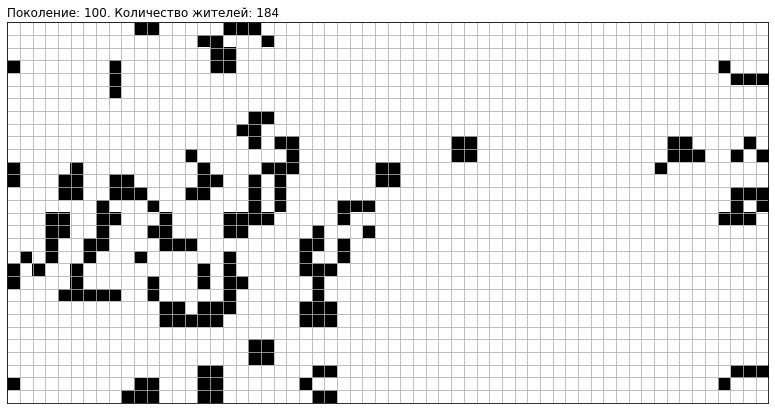

In [25]:
# Запуск игры
game_of_life(gen, N_EPOCHS, figsize, SLEEP_DELAY)